In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [29]:
L = 3.0

x1 = 0.75/2 # Location of Assembly Reaction Forces
x2 = 1 # Location of Bearing 1
x3 = 1.37 # Location of Gear
x4 = L-0.25 # Location of Bearing 2

W_t = -958.3 / 4.48 # Gear Tangential Force
W_tz = W_t * np.tan(np.deg2rad(20))
phi = 20

In [ ]:
# Define the 4x4 coefficient matrix A
A = np.array([[1, 0, 1, 0],
              [0, 1, 0, 1],
              [0, 0, x4-x1, 0],
              [0, 0, 0, x4-x1]])

# Define the right-hand side vector B
B = np.array([-W_t, -W_tz, -W_t * (x3 - x1), -W_tz * (x3 - x1)])

# Check if the matrix is singular before solving
if np.linalg.det(A) == 0:
    print("Matrix A is singular, cannot solve!")
else:
    # Solve the system of linear equations A * X = B
    X = np.linalg.solve(A, B)
    [Ry,Rz,By,Bz] = X
    print("Solution vector X:", X)


Solution vector X: [124.29078947  45.23814776  89.61546053  32.61736016]


In [31]:
# W_t = 958.3 / 4.48 # Gear Tangential Force
# W_tz = W_t * np.tan(np.deg2rad(20))

In [32]:
# F1y_b1 = ((x3 - x2) * W_t) / (x2 - x1)
# F1z_b1 = ((x3 - x2) * W_tz) / (x2 - x1)

# F1y_b2 = - ((x4 - x3) * W_t) / (x4 - x1)
# F1z_b2 = - ((x4 - x3) * W_tz) / (x4 - x1)

# F1y = (F1y_b1 + F1y_b2) / 2
# F1z = (F1z_b1 + F1z_b2) / 2

# #F1y = 35
# #F1z = 25

# print("F1y:", F1y, "F1z:", F1z)

In [33]:
# # Bearing 1 Calculations
# B1y = (((x4 - x3) * W_t) + ((x4 - x1) * F1y)) / (x4 - x2)
# B1z = (((x4 - x3) * W_tz) + ((x4 - x1) * F1z)) / (x4 - x2)

# # Bearing 2 Calculations
# B2y = - ((-1 * F1y) + B1y - W_t)
# B2z = - ((-1 * F1z) + B1z - W_tz)

# print("B1y:", B1y, "B2y:", B2y)
# print("B1z:", B1z, "B2z:", B2z)

# Determining Moment & Shear Diagrams

In [ ]:
#Define Shear constants
RINy = -Ry #@ x=x1 in
RINz = -Rz #@ x=x1 in

RB1y = 0 #@ x=x2 in No bearing here any more
RB1z = 0 #@ x=x2 in No bearing here any more

W12y = -W_t #@ x=x3 in
W12z = -W_tz #@ x=x3 in

RB2y = -By #@ x=x4 in
RB2z = -Bz #@ x=x4 in

# Create a range of x values from 0 to 10 in increments of 0.01
x_inches = x_values = np.arange(0, L+0.01, 0.01)

# Create the DataFrame with x in inches
df = pd.DataFrame({'x_inches': x_inches})

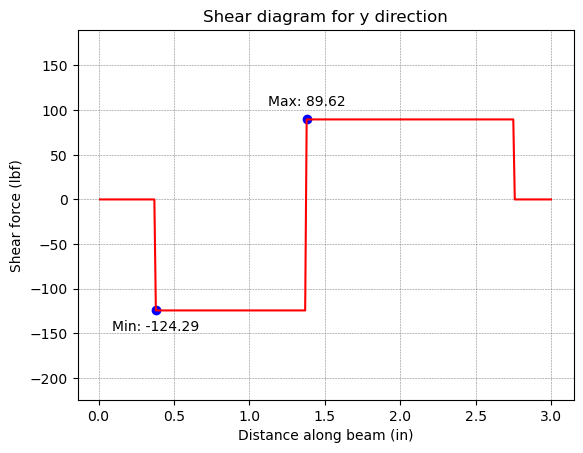

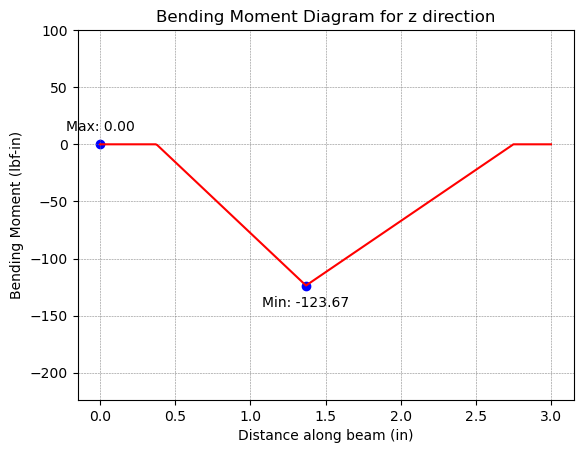

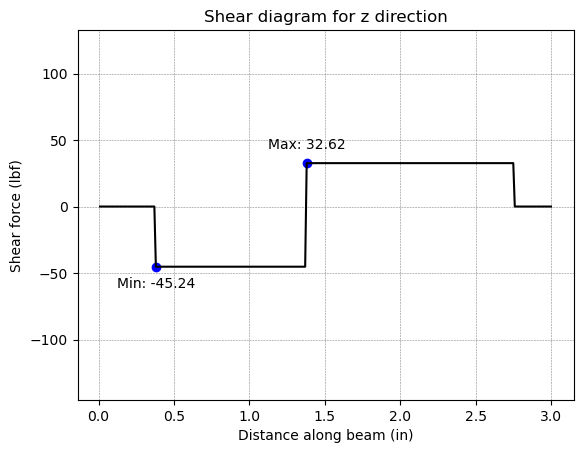

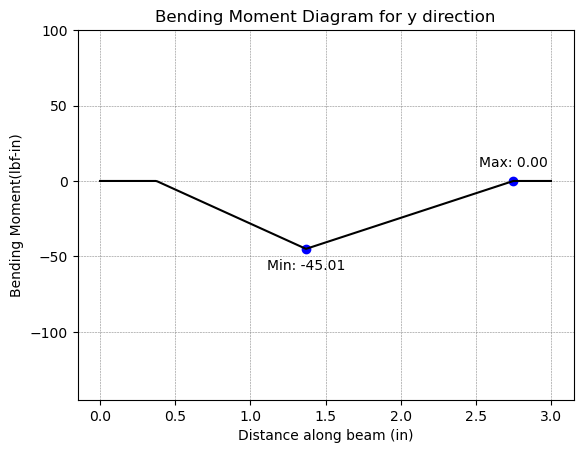

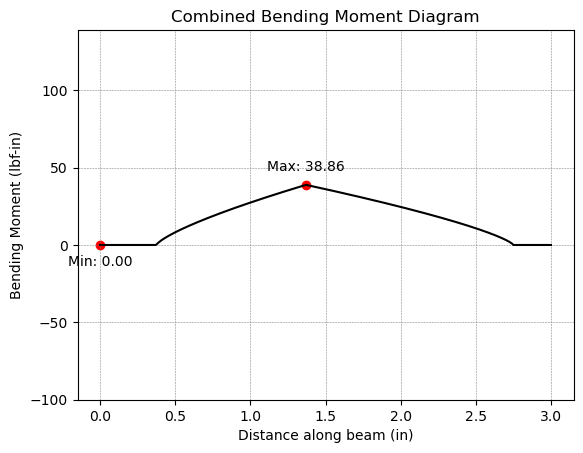

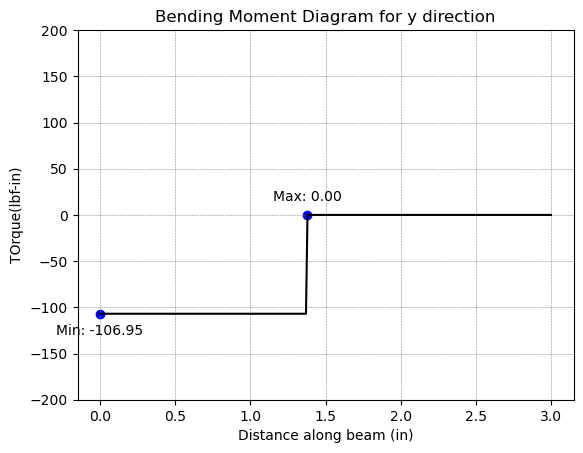

In [35]:
def setShear(x,dir):
    if 0.00<x<=x1:
        return 0
    elif x1<x<=x2:
        return RINy if dir=='y' else RINz
    elif x2<x<=x3:
        return RINy+RB1y if dir=='y' else RINz+RB1z
    elif x3<x<=x4:
        return RINy+RB1y+W12y if dir=='y' else RINz+RB1z+W12z
    elif x>=x4:
        return RINy+RB1y+ W12y+RB2y if dir=='y' else RINz+RB1z+W12z+RB2z

def setMoment(x,dir):
    if dir == 'z':
        if 0.00<=x<=x1:
            return 0
        elif x1<=x<=x2:
            return RINy*(x-x1)
        elif x2<=x<=x3:
            return RINy*(x2-x1) + (RINy+RB1y)*(x-x2)
        elif x3<=x<=x4:
            return RINy*(x2-x1) + (RINy+RB1y)*(x3-x2) + (RINy+RB1y+W12y)*(x-x3)
        elif x>=x4:
            return RINy*(x2-x1) + (RINy+RB1y)*(x3-x2) + (RINy+RB1y+W12y)*(x4-x3) + (RINy+RB1y+W12y+RB2y)*(x-x4)
    else :
        if 0.00<=x<=x1:
            return 0
        elif x1<=x<=x2:
            return RINz*(x-x1)
        elif x2<=x<=x3:
            return RINz*(x2-x1) + (RINz+RB1z)*(x-x2)
        elif x3<=x<=x4:
            return RINz*(x2-x1) + (RINz+RB1z)*(x3-x2) + (RINz+RB1z+W12z)*(x-x3)
        elif x>=x4:
            return RINz*(x2-x1) + (RINz+RB1z)*(x3-x2) + (RINz+RB1z+W12z)*(x4-x3) + (RINz+RB1z+W12z+RB2z)*(x-x4)
d_p = 1

def setTorque(x):
    if 0.00<=x<=x3:
        return W_t * (d_p / 2)
    else:
        return 0

df['Vy'] = df['x_inches'].apply(setShear, dir='y')
df['Vz'] = df['x_inches'].apply(setShear, dir='z')
df['Mz'] = df['x_inches'].apply(setMoment, dir='z')
df['My'] = df['x_inches'].apply(setMoment, dir='y')
df['T'] = df['x_inches'].apply(setTorque)

# Find maxima and minima
max_Vy = df.loc[df['Vy'].idxmax()]
min_Vy = df.loc[df['Vy'].idxmin()]
max_Mz = df.loc[df['Mz'].idxmax()]
min_Mz = df.loc[df['Mz'].idxmin()]
max_Vz = df.loc[df['Vz'].idxmax()]
min_Vz = df.loc[df['Vz'].idxmin()]
max_My = df.loc[df['My'].idxmax()]
min_My = df.loc[df['My'].idxmin()]
max_T = df.loc[df['T'].idxmax()]
min_T = df.loc[df['T'].idxmin()]

# Plot Shear for y direction
plt.plot(df['x_inches'], df['Vy'], color='red')
plt.scatter([max_Vy['x_inches'], min_Vy['x_inches']], [max_Vy['Vy'], min_Vy['Vy']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_Vy["Vy"]:.2f}', (max_Vy['x_inches'], max_Vy['Vy']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_Vy["Vy"]:.2f}', (min_Vy['x_inches'], min_Vy['Vy']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=x1, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Shear force (lbf)')
# Adjust the y-axis limits for Shear for y direction
plt.ylim(df['Vy'].min() - 100, df['Vy'].max() + 100)
plt.title('Shear diagram for y direction')
plt.show()

# Plot Bending Moment for z direction
plt.plot(df['x_inches'], df['Mz'], color='red')
plt.scatter([max_Mz['x_inches'], min_Mz['x_inches']], [max_Mz['Mz'], min_Mz['Mz']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_Mz["Mz"]:.2f}', (max_Mz['x_inches'], max_Mz['Mz']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_Mz["Mz"]:.2f}', (min_Mz['x_inches'], min_Mz['Mz']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=x1, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Bending Moment (lbf-in)')
# Adjust the y-axis limits for Bending Moment for z direction
plt.ylim(df['Mz'].min() - 100, df['Mz'].max() + 100)
plt.title('Bending Moment Diagram for z direction')
plt.show()

# Plot Shear for z direction
plt.plot(df['x_inches'], df['Vz'], color='black')
plt.scatter([max_Vz['x_inches'], min_Vz['x_inches']], [max_Vz['Vz'], min_Vz['Vz']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_Vz["Vz"]:.2f}', (max_Vz['x_inches'], max_Vz['Vz']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_Vz["Vz"]:.2f}', (min_Vz['x_inches'], min_Vz['Vz']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=x1, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Shear force (lbf)')
# Adjust the y-axis limits for Shear for z direction
plt.ylim(df['Vz'].min() - 100, df['Vz'].max() + 100)
plt.title('Shear diagram for z direction')
plt.show()

# Plot Bending for y moment
plt.plot(df['x_inches'], df['My'], color='black')
plt.scatter([max_My['x_inches'], min_My['x_inches']], [max_My['My'], min_My['My']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_My["My"]:.2f}', (max_My['x_inches'], max_My['My']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_My["My"]:.2f}', (min_My['x_inches'], min_My['My']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=x1, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Bending Moment(lbf-in)')
# Adjust the y-axis limits for Torque
plt.ylim(df['My'].min() - 100, df['My'].max() + 100)
plt.title('Bending Moment Diagram for y direction')
plt.show()

#Plot Combine moment
df['Mcombined'] = ((df['My'])**2 + (df['Mz'])**2)**x1
# Find maxima and minima for combined bending moment
max_Mcombined = df.loc[df['Mcombined'].idxmax()]
min_Mcombined = df.loc[df['Mcombined'].idxmin()]
# Plot Combined Bending Moment
plt.plot(df['x_inches'], df['Mcombined'], color='black')
# Add max and min points
plt.scatter([max_Mcombined['x_inches'], min_Mcombined['x_inches']], [max_Mcombined['Mcombined'], min_Mcombined['Mcombined']], color='red')
# Annotate max and min points
plt.annotate(f'Max: {max_Mcombined["Mcombined"]:.2f}', (max_Mcombined['x_inches'], max_Mcombined['Mcombined']), textcoords="offset points", xytext=(0, 10), ha='center', color='black')
plt.annotate(f'Min: {min_Mcombined["Mcombined"]:.2f}', (min_Mcombined['x_inches'], min_Mcombined['Mcombined']), textcoords="offset points", xytext=(0, -15), ha='center', color='black')
# Other plot settings
plt.grid(True, color='grey', linewidth=x1, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('Bending Moment (lbf-in)')
# Adjust the y-axis limits for Combined Bending Moment
plt.ylim(df['Mcombined'].min() - 100, df['Mcombined'].max() + 100)
plt.title('Combined Bending Moment Diagram')
plt.show()

# Plot Bending for Torque
plt.plot(df['x_inches'], df['T'], color='black')
plt.scatter([max_T['x_inches'], min_T['x_inches']], [max_T['T'], min_T['T']], color='blue')  # Add max and min points
plt.annotate(f'Max: {max_T["T"]:.2f}', (max_T['x_inches'], max_T['T']), textcoords="offset points", xytext=(0, 10), ha='center')
plt.annotate(f'Min: {min_T["T"]:.2f}', (min_T['x_inches'], min_T['T']), textcoords="offset points", xytext=(0, -15), ha='center')
plt.grid(True, color='grey', linewidth=x1, linestyle='--')
plt.xlabel('Distance along beam (in)')
plt.ylabel('TOrque(lbf-in)')
# Adjust the y-axis limits for Torque
plt.ylim(-200, df['T'].max() + 200)
plt.title('Bending Moment Diagram for y direction')
plt.show()

In [40]:
import math
df2 = pd.DataFrame({'x_loc': np.array([x3])})
df2['M'] = df2['x_loc'].apply(lambda x_ref: df.loc[df['x_inches'] == x_ref, 'Mcombined'].iloc[0])
df2['Ma'] = df2['M']
df2['Mm'] = df2['M']-df2['M']
df2['Ta'] = np.zeros_like(df2['x_loc'])
df2['Tm']= np.array([W_t * (d_p /2)])

In [41]:
d1 = 0.5
dfsigma = pd.DataFrame({'x_loc': np.array([x3])})
dfsigma['d'] = np.array([d1])
dfsigma['siga'] = (32/(math.pi*dfsigma['d']**3))*df2['Ma']
dfsigma['sigm'] = (32/(math.pi*dfsigma['d']**3))*df2['Mm']
dfsigma['taua'] = (16/(math.pi*dfsigma['d']**3))*df2['Ta']
dfsigma['taum'] = (16/(math.pi*dfsigma['d']**3))*df2['Tm']

dfsigma['Kt']=np.array([2.14])
dfsigma['Kts']=np.array([3])

dfsigma['q']=np.ones_like(df2['x_loc'])*1
dfsigma['qs']=np.ones_like(df2['x_loc'])*1
dfsigma['Kf']= 1 + dfsigma['q']*(dfsigma['Kt']-1)
dfsigma['Kfs']= 1 + dfsigma['qs']*(dfsigma['Kts']-1)

dfsigma['sigm_vm'] = (((dfsigma['sigm'])*dfsigma['Kf'])**2 + 3*(dfsigma['taum']*dfsigma['Kfs'])**2)**(0.5)
dfsigma['siga_vm'] = (((dfsigma['siga'])*dfsigma['Kf'])**2 + 3*(dfsigma['taua']*dfsigma['Kfs'])**2)**(0.5)

dfsigma.head()
#dfsigma.to_excel('partAP2.xlsx')


,x_loc,d,siga,sigm,taua,taum,Kt,Kts,q,qs,Kf,Kfs,sigm_vm,siga_vm
0,1.37,0.5,3166.264931,0.0,0.0,-4357.662342,2.14,3,1.0,1.0,2.14,3.0,22643.077735,6775.806952


In [42]:
# Material:
Sy = 208e3
Sut = 225e3

ka = 2 * ((Sut/(10**3)) ** -0.217)
#ka = 0.8
kb = 0.879 * (d_p ** -0.107)
kc = 1
kd = 1
ke = 1

print(ka)
print(kb)
print(kc)
print(kd)
print(ke)

dfMat = pd.DataFrame(df2['x_loc'])
dfMat['Sut']=np.ones_like(df2['x_loc'])*Sut
dfMat['SeExp'] = 100e3#dfMat['Sut']/2
dfMat['kb'] =  np.array ([kb])
dfMat['Se']= dfMat['SeExp'] * ka * dfMat['kb'] * kc * kd * ke
dfMat['nf'] = ((dfsigma['sigm_vm'])/(dfMat['Sut']) + (dfsigma['siga_vm'])/(dfMat['Se']))**-1
dfMat['ny'] = (Sy)/(((dfsigma['sigm_vm'])**2+ (dfsigma['siga_vm'])**2)**0.5)
dfMat.head()
#dfMat.to_excel('partAP3.xlsx')

0.6174565318527974
0.879
1
1
1


,x_loc,Sut,SeExp,kb,Se,nf,ny
0,1.37,225000.0,100000.0,0.879,54274.42915,4.434996,8.80045


In [39]:
RB1 = [B1y, B1z]
RB2 = [B2y, B2z]

print(RB1, RB2)

FD1 = ((RB1[0])**2 + (RB1[1])**2)**0.5
FD2 = ((RB2[0])**2 + (RB2[1])**2)**0.5

print (FD1,FD2)

#Convert to kilo newtons
#FD1 = FD1 * 4.44822/1000
#FD2 = FD2 * 4.44822/1000

print(FD1,FD2)

#t = 15000 * 60  ##Need to be changed
#N = 4000 ##Needs to be changed

LR = 10**6
LD = 15000 * 60 * 27.5
#LD = 45 * 60 * 27.5
a = 3
a1 = 1

FR1 = (FD1/a1)*((LD/LR)**(1/a))
FR2 = (FD2/a1)*((LD/LR)**(1/a))

print(FR1,FR2,LD)
# https://www.mcmaster.com/60355K291/ (Static Load Max: 530 lbf, Dynamic Load Max: 1140 lbf, Max RPM: 25k)

NameError: name 'B1y' is not defined

In [ ]:
T = W_t * (d_p / 2)
n = 3

# Table 7-6 (Over 7/16 and Below 9/16)
w = 1/8
h = 1/8

r = (d_p / 2)

Sy = 45*(10**3)

ltau = T*n/(0.577*Sy*r*w)
lc = 2*T*n/(Sy*r*h)

print (ltau,lc)

0.19771808203350663 0.22816666666666663
